In [16]:
import pandas as pd
import os
import numpy as np
from collections import Counter
import re

### 폴더명을 입력받아 해당 폴더의 하위 폴더명을 추출

In [2]:
def read_log(dir):
    sub_folders = os.listdir(dir)
    for i in range(len(sub_folders)):
        sub_folders[i] = './logs/' + sub_folders[i]
        
    return sub_folders

In [3]:
logs_sub = read_log('./logs')
print(logs_sub)

['./logs/ias', './logs/kps', './logs/pcsi']


### 컴포넌트별 경로를 Dictionary 형태로 저장

In [4]:
comp = {
    'IAS': logs_sub[0],
    'KPS': logs_sub[1],
    'PCSI': logs_sub[2],
}

### 컴포넌트 경로를 입력받아 하위 파일들의 경로를 리턴

In [5]:
def find_file(comp_name):
    dir = comp[comp_name]
    files = os.listdir(dir)
    
    for i in range(len(files)):
        files[i] = dir + '/' + files[i]
    
    return files

## ias, kps, pcsi folder에 있는 파일명들을 모두 추출

In [6]:
ias_files = find_file('IAS')
for file in ias_files:
    print(file)
    
kps_files = find_file('KPS')
for file in kps_files:
    print(file)
    
pcsi_files = find_file('PCSI')
for file in pcsi_files:
    print(file)

./logs/ias/ias-SC-WALLET05-SK-KM-ias_tr-4-2022011800-0.log
./logs/ias/ias-SC-WALLET05-SK-KM-ias_tr-4-2022011801-0.log
./logs/ias/ias-SC-WALLET05-SK-KM-ias_tr-4-2022011802-0.log
./logs/ias/ias-SC-WALLET05-SK-KM-ias_tr-4-2022011803-0.log
./logs/ias/ias-SC-WALLET05-SK-KM-ias_tr-4-2022011804-0.log
./logs/ias/ias-SC-WALLET05-SK-KM-ias_tr-4-2022011805-0.log
./logs/ias/ias-SC-WALLET05-SK-KM-ias_tr-4-2022011806-0.log
./logs/ias/ias-SC-WALLET05-SK-KM-ias_tr-4-2022011807-0.log
./logs/ias/ias-SC-WALLET05-SK-KM-ias_tr-4-2022011808-0.log
./logs/ias/ias-SC-WALLET05-SK-KM-ias_tr-4-2022011809-0.log
./logs/ias/ias-SC-WALLET05-SK-KM-ias_tr-4-2022011810-0.log
./logs/ias/ias-SC-WALLET05-SK-KM-ias_tr-4-2022011811-0.log
./logs/ias/ias-SC-WALLET05-SK-KM-ias_tr-4-2022011812-0.log
./logs/ias/ias-SC-WALLET05-SK-KM-ias_tr-4-2022011813-0.log
./logs/ias/ias-SC-WALLET05-SK-KM-ias_tr-4-2022011814-0.log
./logs/ias/ias-SC-WALLET05-SK-KM-ias_tr-4-2022011815-0.log
./logs/ias/ias-SC-WALLET05-SK-KM-ias_tr-4-2022011816-0.l

### 파일을 읽고 'RES]'가 포함된 행을 추출하는 함수 

In [7]:
def read_file(file_path):
    with open(file_path, 'r', encoding = 'UTF-8') as f:
        data = f.readlines()
    
    res_list = [line for line in data if 'RES]' in line]
    return res_list

### 각 컴포넌트 별로 'RES]'가 포함된 행 모두 추출

#### ias

In [8]:
IAS = []
for file in ias_files:
    IAS.extend(read_file(file))

In [9]:
print(len(IAS))

116039


#### kps

In [10]:
KPS = []
for file in kps_files:
    KPS.extend(read_file(file))

In [11]:
print(len(KPS))

121026


#### pcsi

In [12]:
PCSI = []
for file in pcsi_files:
    PCSI.extend(read_file(file))

In [13]:
print(len(PCSI))

8627845


### ias컴포넌트 첫 번째 라인을 ' '으로 split하여 살펴본다.

In [14]:
print(IAS[0].split(' '))

['2022-01-18', '00:00:13.992.XNIO-1', 'task-511>', 'INFO', '', 'T[220118000013-6299359]', 'U[]', '-', '[CLIENT-RES]', 'GET', '/issuer-authorization-system-1.0/health', '200', '6ms\t{"status":"UP","details":{"application":{"status":"UP","details":{"version":"4.38.0.00","hash":"0b96c31","build-date":"2021-10-2512:27:33"}},"rabbit":{"status":"UP","details":{"version":"3.6.9"}},"diskSpace":{"status":"UP","details":{"total":590680485888,"free":236412022784,"threshold":10485760}},"db":{"status":"UP","details":{"database":"Oracle","hello":1}}}}\n']


## \<IAS>
### total = line.split(' ')
### datetime = total[0] + total[1].split('.')[0]
### reqtype = total[9]
### url = total[10]
### time_ms = total[12]

### => KPS, PCSI도 동일할 것이라 생각하고 DataFrame 생성하는 함수 작성

In [15]:
def make_df(comp_list, comp_name):
    datetime_list = []
    reqtype_list = []
    url_list = []
    time_ms_list = []
    
    for line in comp_list:
        total = line.split(' ')
        datetime = total[0] + ' ' + total[1].split('.')[0]
        reqtype = total[9]
        url = total[10]
        time_ms = total[12]
        
        datetime_list.append(datetime)
        reqtype_list.append(reqtype)
        url_list.append(url)
        time_ms_list.append(time_ms)
        
    df = pd.DataFrame({
        'COMPONENT': [comp_name] * len(comp_list),
        'datetime': datetime_list,
        'REQTYPE': reqtype_list,
        'URL': url_list,
        'TIME_MS': time_ms_list
    })
    
    return df 

### ias_df
### TIME_MS 컬럼에 \t 구분자가 포함된 이상 값이 있다. 

In [ ]:
ias_df = make_df(IAS, 'IAS')
ias_df

### kps_df
### IndexError 발생

In [ ]:
kps_df = make_df(KPS, 'KPS')
kps_df

### pcsi_df
### REQTYPE, URL, TIME_MS에 다른 값이 들어가 있다.

In [ ]:
pcsi_df = make_df(PCSI, 'PCSI')
pcsi_df

### KPS와 PCSI의 데이터도 각각 split해서 살펴본다.

#### KPS

In [ ]:
for i in KPS[:5]:
    print(i.split(' '))

## \<KPS>
### total = line.split(' ')
### datetime = total[0].split('.')[0] (연월일은 빠져있다.)
### reqtype = total[8]
### url = total[9]
### time_ms = total[11]

In [ ]:
KPS[0].split(' ')[9]

#### PCSI

In [ ]:
for i in PCSI[:5]:
    print(i.split(' '))

## \<PCSI>
### total = line.split(' ')
### datetime = total[0] + total[1].split('.')[0]
### reqtype = total[10]"
### url = total[11]
### time_ms = total[13]

In [ ]:
PCSI[0].split(' ')[13]

### 종합하여 함수 다시 작성
#### total = line.split(' ')
### \<IAS>
#### datetime = total[0] + total[1].split('.')[0]
#### reqtype = total[10]
#### url = total[11]
#### time_ms = total[12]

### \<KPS>
#### datetime = total[0].split('.')[0] (연월일은 빠져있다.)
#### reqtype = total[8]
#### url = total[9]
#### time_ms = total[11]

### \<PCSI>
#### datetime = total[0] + total[1].split('.')[0]
#### reqtype = total[10]
#### url = total[11]
#### time_ms = total[13]

In [ ]:
def make_df(comp_list, comp_name):
    datetime_list = []
    reqtype_list = []
    url_list = []
    time_ms_list = []
    
    for line in comp_list:
        total = line.split(' ')
        if comp_name == 'KPS':
        # kps 중 XNIO-1이 포함된 로그와 안된 로그는 split(' ')을 했을 때 길이가 다르기 때문에 따로 설정  
            if len(total) == 12:
                datetime = total[0].split('.')[0]
                reqtype = total[7]
                url = total[8]
                time_ms = total[10]
            else:
                datetime = total[0].split('.')[0]
                reqtype = total[8]
                url = total[9]
                time_ms = total[11]
        else: 
            datetime = total[0] + ' ' + total[1].split('.')[0]
            if comp_name == 'IAS':
                reqtype = total[9]
                url = total[10]
                time_ms = total[12]
            elif comp_name == 'PCSI':
                reqtype = total[10]
                url = total[11]
                time_ms = total[13]
        
        datetime_list.append(datetime)
        reqtype_list.append(reqtype)
        url_list.append(url)
        time_ms_list.append(time_ms)
        
    df = pd.DataFrame({
        'COMPONENT': [comp_name] * len(comp_list),
        'datetime': datetime_list,
        'REQTYPE': reqtype_list,
        'URL': url_list,
        'TIME_MS': time_ms_list
    })
    
    return df 

#### ias 

In [ ]:
ias_df = make_df(IAS, 'IAS')
ias_df

#### kps

In [ ]:
kps_df = make_df(KPS, 'KPS')
kps_df

#### pcsi

In [ ]:
pcsi_df = make_df(PCSI, 'PCSI')
pcsi_df

### ias, kps, pcsi 로그 모두 합친 DataFrame

In [ ]:
log_df = pd.concat([ias_df, kps_df, pcsi_df], ignore_index = True)
log_df

In [ ]:
log_df['REQTYPE'].unique()

### kps 컴포넌트의 datetime에 연월일이 빠져있기 때문에 채운다.

In [ ]:
kps_df

### 파일명에 적힌 연월일을 바탕으로 채워준다.

In [ ]:
def add_date(files, df):
    file = files[0]
    date = file.split('-')[7]
    year = date[:4]
    month = date[4:6]
    day = date[6:8]
    new_date = f'{year}-{month}-{day}'
    
    df['datetime'] = f'{new_date} ' + df['datetime']
    return df

In [ ]:
kps_df = add_date(kps_files, kps_df)

In [ ]:
kps_df

### TIME_MS에 이상한 값이 들어가 있는 행이 있다. 
### 해당 행의 URL에는 http:// 형식이 아닌 /issuer- 로 시작하는 문자열이 들어가 있을 것으로 예상
### 해당 행만 따로 추출해서 살펴본다.

In [ ]:
def is_error(col):
    if '\t' in col:
        return True
    else:
        return False
    
err = ias_df['TIME_MS'].apply(is_error)

In [ ]:
err_index = []
for i in range(len(err)):
    if err[i] == True:
        err_index.append(i)

print(err_index)

### 언뜻 보기에는 url이 /issuer-로 시작하는 행에 문제가 있는 것으로 보인다. 
### 혹시 모르니 확인해본다. 

In [ ]:
ms_error_df = ias_df.loc[err_index]
ms_error_df

In [ ]:
def is_issuer(url):
    if '/issuer' in url:
        return True
    else:
        return False

temp = ms_error_df['URL'].apply(is_issuer)

for i in temp:
    if i == False:
        print(i)

### 아무것도 print 되지 않았으므로 URL이 /issuer- 로 시작하는 행이 문제
### 예외 처리를 해주어 함수를 다시 작성한다.

### 하다가 정규식으로 넘어감.

In [ ]:
def make_df(comp_list, comp_name):
    datetime_list = []
    reqtype_list = []
    url_list = []
    time_ms_list = []
    
    for line in comp_list:
        total = line.split(' ')
        if comp_name == 'KPS':
        # kps 중 XNIO-1이 포함된 로그와 안된 로그는 split(' ')을 했을 때 길이가 다르기 때문에 따로 설정  
            if len(total) == 12:
                datetime = total[0].split('.')[0]
                reqtype = total[7]
                url = total[8]
                time_ms = total[10]
            else:
                datetime = total[0].split('.')[0]
                reqtype = total[8]
                url = total[9]
                time_ms = total[11]
        else: 
            datetime = total[0] + ' ' + total[1].split('.')[0]
            if comp_name == 'IAS':
                reqtype = total[9]
                url = total[10]
                time_ms = total[12]
            elif comp_name == 'PCSI':
                reqtype = total[10]
                url = total[11]
                time_ms = total[13]
        
        datetime_list.append(datetime)
        reqtype_list.append(reqtype)
        url_list.append(url)
        time_ms_list.append(time_ms)
        
    df = pd.DataFrame({
        'COMPONENT': [comp_name] * len(comp_list),
        'datetime': datetime_list,
        'REQTYPE': reqtype_list,
        'URL': url_list,
        'TIME_MS': time_ms_list
    })
    
    return df 

### split은 예외처리가 많이 필요하기 때문에 정규식으로 해결(데이터가 많을 경우 시간이 좀 더 걸릴 수는 있음.)
#### time_reg = r'\d{4}-\d{2}-\d{2}\s\d{2}:\d{2}:\d{2}' (kps는 연, 월, 일이 포함되어 있지 않다. => r'\d{2}:\d{2}:\d{2}')
#### trans_id_reg = r'T\[(.*?)\]'
#### reqtype = in을 통해 'GET' or 'POST'
#### url_reg = r'http://\S*'
#### time_ms_reg = r'\d*ms'
#### status_reg = r' \d\d\d '

In [ ]:
pcsi_df = make_df(PCSI, 'PCSI')
pcsi_df

In [ ]:
# kps의 datetime에는 연월일이 빠져있다. 
kps_df = make_df(KPS, 'KPS')
kps_df

In [ ]:
# ias, kps, pcsi 로그 모두 합친 DataFrame
log_df = pd.concat([ias_df, kps_df, pcsi_df], ignore_index = True)
log_df

In [ ]:
time_reg = r'\d{4}-\d{2}-\d{2}\s\d{2}:\d{2}:\d{2}'
trans_id_reg = r'T\[(.*?)\]'
url_reg = r'http://\S*'
time_ms_reg = r'\d*ms'
status_reg = r'\s\d\d\d\s'
reqtype_reg = r']\s[A-Z][A-Z][A-Z][A-Z]?\s'
# reqtype_reg_2 = r' [A-Z][A-Z][A-Z][A-Z] '

In [ ]:
sample = IAS[10]
print(sample)

In [ ]:
status = re.search(status_reg, sample)
status.group()

In [ ]:
time = re.search(time_reg, sample)

In [ ]:
time.group()

In [ ]:
trans_id = re.search(trans_id_reg, sample)
trans_id.group()

In [ ]:
url = re.search(url_reg, sample)
url.group()

In [ ]:
time_ms = re.search(time_ms_reg, sample)
time_ms.group()

In [ ]:
reqtype = re.search(reqtype_reg, sample)
reqtype.group()

In [14]:
def make_df(comp_list, comp_name):
    datetime_list = []
    trans_id_list = []
    reqtype_list = []
    url_list = []
    time_ms_list = []
    status_list = []
    
    # 정규식 
    time_reg = r'\d{4}-\d{2}-\d{2}\s\d{2}:\d{2}:\d{2}'
    time_reg_kps = r'\d{2}:\d{2}:\d{2}'
    trans_id_reg = r'T\[(.*?)\]'
    url_reg = r'\shttp://\S*\s'
    time_ms_reg = r'\d+ms'
    status_reg = r'\s\d\d\d\s' 
    reqtype_reg = r']\s[A-Z][A-Z][A-Z][A-Z]?\s'
    
    for line in comp_list:
        if comp_name == 'KPS':
            datetime = re.search(time_reg_kps, line)
        else:
            datetime = re.search(time_reg, line)
        trans_id = re.search(trans_id_reg, line)       
        url = re.search(url_reg, line)     
        time_ms = re.search(time_ms_reg, line)
        status = re.search(status_reg, line)
        reqtype = re.search(reqtype_reg, line)

        if url:
            datetime_list.append(datetime.group())
            trans_id_list.append(trans_id.group())
            url_list.append(url.group())
            time_ms_list.append(time_ms.group())
            reqtype_list.append(reqtype.group().split(' ')[1])
            status_list.append(status.group().strip())
        
    df = pd.DataFrame({
        'COMPONENT': [comp_name] * len(datetime_list),
        'datetime': datetime_list,
        'TRANSACTION_ID': trans_id_list,
        'REQTYPE': reqtype_list,
        'URL': url_list,
        'STATUS': status_list,
        'TIME_MS': time_ms_list
    })
    
    return df 

In [17]:
ias_df = make_df(IAS, 'IAS')
ias_df

,COMPONENT,datetime,TRANSACTION_ID,REQTYPE,URL,STATUS,TIME_MS
0,IAS,2022-01-18 00:01:39,T[220118000139-1ee5c83],GET,http://koditn.konadc.com:10200/api/kod/v2/pro...,200,3ms
1,IAS,2022-01-18 00:01:39,T[220118000139-1ee5c83],GET,http://koditn.konadc.com:10200/api/kod/v2/sto...,200,2ms
2,IAS,2022-01-18 00:01:39,T[220118000139-1ee5c83],GET,http://koditn.konadc.com:10200/api/kod/v2/mer...,200,1ms
3,IAS,2022-01-18 00:01:39,T[220118000139-1ee5c83],GET,http://koditn.konadc.com:10200/api/kod/v2/rec...,200,1ms
4,IAS,2022-01-18 00:01:39,T[220118000139-1ee5c83],GET,http://koditn.konadc.com:10200/api/kod/v2/dat...,200,1ms
...,...,...,...,...,...,...,...
78350,IAS,2022-01-18 23:58:59,T[220118235858-67c0379],GET,http://koditn.konadc.com:10200/api/kod/v2/acq...,200,1ms
78351,IAS,2022-01-18 23:58:59,T[220118235858-67c0379],POST,http://kps.konadc.com:15945/kps/api/v2/point/...,200,84ms
78352,IAS,2022-01-18 23:58:59,T[220118235858-67c0379],POST,http://kps.konadc.com:15945/kps/api/v2/point/...,200,62ms
78353,IAS,2022-01-18 23:59:02,T[220118235901-9595e79],GET,http://koditn.konadc.com:10200/api/kod/v2/pro...,200,4ms


#### ias_df 저장

In [18]:
ias_df.to_csv('processed_ias.csv', index = False)

In [19]:
kps_df = make_df(KPS, 'KPS')
kps_df

,COMPONENT,datetime,TRANSACTION_ID,REQTYPE,URL,STATUS,TIME_MS
0,KPS,00:00:03,T[220118000003-5824ac6],GET,http://koditn.konadc.com:10200/api/kod/v2/asp...,200,2ms
1,KPS,00:00:03,T[220118000003-5824ac6],GET,http://cms.konadc.com:10090/cms-1.0/api/v2/ca...,200,3ms
2,KPS,00:00:03,T[220118000003-5824ac6],GET,http://koditn.konadc.com:10200/api/kod/v2/poi...,200,1ms
3,KPS,00:00:03,T[220118000003-5824ac6],POST,http://dms.konadc.com:10260/dms/donations/rea...,200,4ms
4,KPS,00:00:03,T[220118000003-5824ac6],GET,http://map.konadc.com:10010/mobile-platform-1...,200,10ms
...,...,...,...,...,...,...,...
83204,KPS,23:59:06,T[220118235906-4568aca],GET,http://koditn.konadc.com:10200/api/kod/v2/pol...,200,2ms
83205,KPS,23:59:06,T[220118235906-4568aca],GET,http://koditn.konadc.com:10200/api/kod/v2/poi...,200,1ms
83206,KPS,23:59:06,T[220118235906-4568aca],GET,http://koditn.konadc.com:10200/api/kod/v2/pol...,200,6ms
83207,KPS,23:59:06,T[],GET,http://koditn.konadc.com:10200/api/kod/v2/pro...,200,6ms


In [20]:
kps_df = add_date(kps_files, kps_df)

NameError: name 'add_date' is not defined

In [21]:
kps_df

,COMPONENT,datetime,TRANSACTION_ID,REQTYPE,URL,STATUS,TIME_MS
0,KPS,00:00:03,T[220118000003-5824ac6],GET,http://koditn.konadc.com:10200/api/kod/v2/asp...,200,2ms
1,KPS,00:00:03,T[220118000003-5824ac6],GET,http://cms.konadc.com:10090/cms-1.0/api/v2/ca...,200,3ms
2,KPS,00:00:03,T[220118000003-5824ac6],GET,http://koditn.konadc.com:10200/api/kod/v2/poi...,200,1ms
3,KPS,00:00:03,T[220118000003-5824ac6],POST,http://dms.konadc.com:10260/dms/donations/rea...,200,4ms
4,KPS,00:00:03,T[220118000003-5824ac6],GET,http://map.konadc.com:10010/mobile-platform-1...,200,10ms
...,...,...,...,...,...,...,...
83204,KPS,23:59:06,T[220118235906-4568aca],GET,http://koditn.konadc.com:10200/api/kod/v2/pol...,200,2ms
83205,KPS,23:59:06,T[220118235906-4568aca],GET,http://koditn.konadc.com:10200/api/kod/v2/poi...,200,1ms
83206,KPS,23:59:06,T[220118235906-4568aca],GET,http://koditn.konadc.com:10200/api/kod/v2/pol...,200,6ms
83207,KPS,23:59:06,T[],GET,http://koditn.konadc.com:10200/api/kod/v2/pro...,200,6ms


#### kps_df 저장

In [ ]:
kps_df.to_csv('processed_kps.csv', index = False)

In [ ]:
pcsi_df = make_df(PCSI, 'PCSI')
pcsi_df

In [ ]:
pcsi_df.iloc[3]

In [ ]:
pcsi_df[pcsi_df['datetime'] == '2022-01-18 00:00:00']

#### pcsi_df 저장

In [ ]:
pcsi_df.to_csv('processed_pcsi.csv', index = False)

In [ ]:
sample_df = pcsi_df[pcsi_df['datetime']=="2022-01-18 20:00:00"]
sample_df
# pcsi_df[pcsi_df['datetime'] == '2022-01-18 00:00:00'].index
# len(pcsi_df[pcsi_df['datetime'] == '2022-01-18 20:00:00'])

In [ ]:
sample_df.to_csv('sample.csv', index = False)

In [ ]:
sample_df.iloc[2].URL

In [ ]:
# ias, kps, pcsi 로그 모두 합친 DataFrame
log_df = pd.concat([ias_df, kps_df, pcsi_df], ignore_index = True)
log_df

In [ ]:
ex = log_df[log_df.TRANSACTION_ID == 'T[]'].URL

In [ ]:
ex[:10]

In [ ]:
print(len(ex))

In [ ]:
for i in ex[:10]:
    print(i)

In [ ]:
# http://koditn.konadc.com:10200/api/kod/v2/products/

In [ ]:
temp = []
ano = []
for i in ex:
    if 'http://koditn.konadc.com:10200/api/kod/v2/' in i:
        temp.append(i)
    else:
        ano.append(i)

In [ ]:
print(len(temp))

In [ ]:
print(ano[0])

In [ ]:
ex['URL']

### 전체 결과 csv파일로 저장

In [ ]:
log_df.to_csv('processed_total.csv', index = False)

### csv로 저장한 결과 불러오기

In [22]:
log_df = pd.read_csv('./processed_total.csv')

### TIME_MS에서 숫자만을 추출하여 int_time_ms 컬럼에 추가

In [23]:
int_time_ms = log_df.TIME_MS

In [24]:
int_time_ms

0            3ms
1            2ms
2            1ms
3            1ms
4            1ms
           ...  
8390771      2ms
8390772     17ms
8390773    168ms
8390774      6ms
8390775      3ms
Name: TIME_MS, Length: 8390776, dtype: object

In [25]:
temp = [int(i.split('m')[0]) for i in int_time_ms]
temp

[3,
 2,
 1,
 1,
 1,
 128,
 7,
 4,
 1,
 108,
 8,
 4,
 2,
 1,
 0,
 2,
 540,
 4,
 3,
 1,
 1,
 1,
 1,
 4,
 2,
 2,
 66,
 7,
 59,
 7,
 4,
 68,
 7,
 2,
 4,
 2,
 3,
 4,
 1,
 68,
 6,
 2,
 56,
 8,
 3,
 4,
 3,
 64,
 7,
 19,
 2,
 3,
 4,
 1,
 1,
 47,
 7,
 68,
 6,
 3,
 71,
 6,
 4,
 3,
 12,
 2,
 4,
 3,
 3,
 3,
 2,
 2,
 4,
 3,
 4,
 154,
 8,
 3,
 1,
 1,
 2,
 4,
 3,
 2,
 2,
 4,
 4,
 7,
 3,
 2,
 4,
 71,
 6,
 3,
 1,
 1,
 0,
 5,
 5,
 5,
 31,
 21,
 5,
 4,
 2,
 4,
 2,
 1,
 0,
 6,
 6,
 4,
 31,
 21,
 5,
 2,
 8,
 5,
 3,
 24,
 72,
 4,
 3,
 3,
 8,
 4,
 2,
 1,
 2,
 4,
 55,
 5,
 4,
 2,
 1,
 2,
 5,
 6,
 5,
 15,
 60,
 6,
 4,
 3,
 7,
 7,
 4,
 4,
 6,
 4,
 4,
 5,
 2,
 1,
 1,
 32,
 8,
 5,
 2,
 1,
 4,
 3,
 3,
 3,
 5,
 3,
 4,
 4,
 6,
 3,
 5,
 2,
 1,
 4,
 4,
 4,
 5,
 3,
 5,
 4,
 4,
 4,
 2,
 1,
 1,
 339,
 7,
 4,
 2,
 6,
 3,
 2,
 3,
 4,
 5,
 3,
 5,
 5,
 4,
 5,
 5,
 4,
 2,
 4,
 4,
 4,
 4,
 3,
 65,
 6,
 4,
 71,
 5,
 2,
 1,
 2,
 38,
 60,
 5,
 5,
 2,
 1,
 4,
 6,
 5,
 2,
 1,
 1,
 0,
 28,
 5,
 6,
 28,
 21,
 5,
 5,
 4,
 38,
 5,
 5,


In [26]:
log_df['int_time_ms'] = temp
log_df

,COMPONENT,datetime,TRANSACTION_ID,REQTYPE,URL,STATUS,TIME_MS,int_time_ms
0,IAS,2022-01-18 00:01:39,T[220118000139-1ee5c83],GET,http://koditn.konadc.com:10200/api/kod/v2/prod...,200,3ms,3
1,IAS,2022-01-18 00:01:39,T[220118000139-1ee5c83],GET,http://koditn.konadc.com:10200/api/kod/v2/stor...,200,2ms,2
2,IAS,2022-01-18 00:01:39,T[220118000139-1ee5c83],GET,http://koditn.konadc.com:10200/api/kod/v2/merc...,200,1ms,1
3,IAS,2022-01-18 00:01:39,T[220118000139-1ee5c83],GET,http://koditn.konadc.com:10200/api/kod/v2/rech...,200,1ms,1
4,IAS,2022-01-18 00:01:39,T[220118000139-1ee5c83],GET,http://koditn.konadc.com:10200/api/kod/v2/date...,200,1ms,1
...,...,...,...,...,...,...,...,...
8390771,PCSI,2022-01-18 23:59:59,T[220118235959-9f8c943],GET,http://cams.konadc.com:10340/cams/api/issued-c...,200,2ms,2
8390772,PCSI,2022-01-18 23:59:59,T[220118235959-9f8c943],GET,http://cms.konadc.com:10090/cms-1.0/api/pars/e...,400,17ms,17
8390773,PCSI,2022-01-18 23:59:59,T[220118235959-9f8c943],POST,http://konacard-contents.azureedge.net/service...,200,168ms,168
8390774,PCSI,2022-01-18 23:59:59,T[220118235959-7d16d0d],POST,http://ias.konadc.com:10100/issuer-authorizati...,200,6ms,6


In [27]:
ex = log_df[log_df['STATUS'] == 404].URL

In [28]:
print(ex[1783384])

http://cardse.konadc.com:10300/cardse-service/api/cardse/cards/info/token


In [29]:
for i in ex:
    print(i)

http://cardse.konadc.com:10300/cardse-service/api/cardse/cards/info/token
http://dcp.konadc.com:10000/cloud-platform-1.0/api/cards/token


### pcsi-SC-WALLET05-SK-KM-pcsi-9-2022011811-1 파일에 STATUS = 404존재 
### url이 token에서 끝난다. 

In [32]:
log_df[log_df['STATUS'] == 404]

,COMPONENT,datetime,TRANSACTION_ID,REQTYPE,URL,STATUS,TIME_MS,int_time_ms
1783384,PCSI,2022-01-18 11:17:07,T[220118111707-fdc1c306],GET,http://cardse.konadc.com:10300/cardse-service/...,404,4ms,4
1783389,PCSI,2022-01-18 11:17:07,T[220118111707-fdc1c306],GET,http://dcp.konadc.com:10000/cloud-platform-1.0...,404,13ms,13


# 시각화 

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

### ias, kps, pcsi가 각각 차지하는 비율을 알기 위한 파이차트

In [34]:
# values = [len(log_df.COMPONENT)]
len 
n_ias = len(log_df[log_df.COMPONENT == 'IAS'])
n_kps = len(log_df[log_df.COMPONENT == 'KPS'])
n_pcsi = len(log_df[log_df.COMPONENT == 'PCSI'])

In [35]:
values = [n_ias, n_kps, n_pcsi]
print(values)

[78355, 83209, 8229212]


Text(0.5, 1.0, 'COMPONENT')

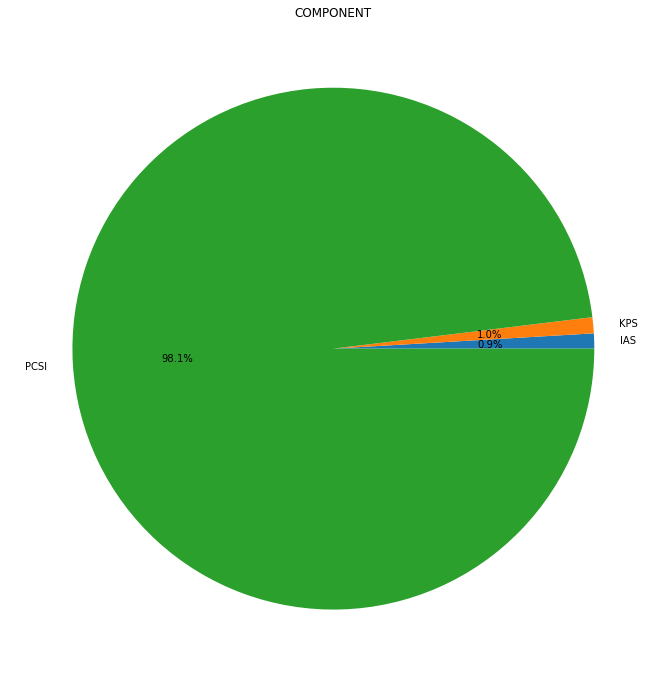

In [36]:
labels = ['IAS', 'KPS', 'PCSI']
plt.figure(figsize = (12, 12))
plt.pie(values, labels = labels, autopct = '%.1f%%')
plt.title('COMPONENT')

### => 98%이상이 PCSI이고 KPS와 IAS는 1%대로 서로 비슷하다.

### reqtype별 비율을 알기 위한 파이차트

In [37]:
log_df.REQTYPE.unique()

array(['GET', 'POST'], dtype=object)

In [38]:
n_get = len(log_df[log_df.REQTYPE == 'GET'])
n_post = len(log_df[log_df.REQTYPE == 'POST'])

In [39]:
values = [n_get, n_post]
print(values)

[5392135, 2998641]


Text(0.5, 1.0, 'REQTYPE')

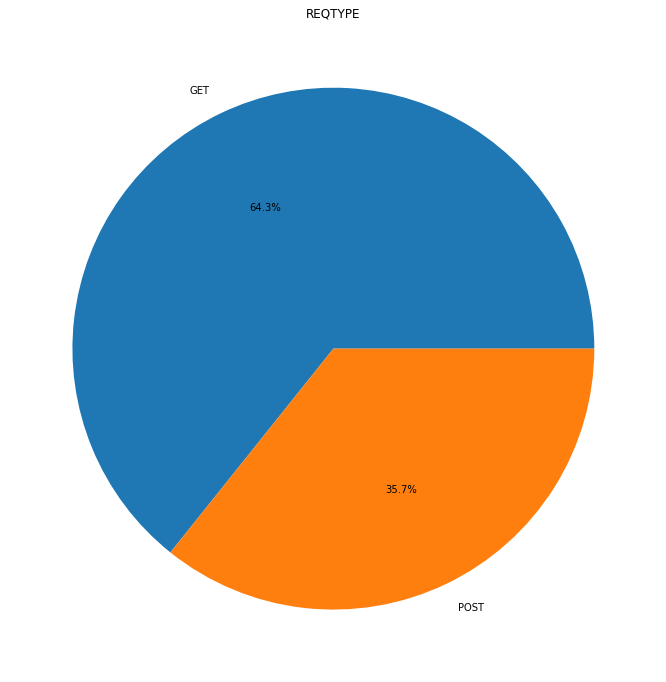

In [40]:
labels = ['GET', 'POST']
plt.figure(figsize = (12, 12))
plt.pie(values, labels = labels, autopct = '%.1f%%')
plt.title('REQTYPE')

### => GET방식이 64.3%로 35.7%인 POST방식보다 월등히 많다.

### Status별 막대 그래프

In [41]:
log_df.STATUS.unique()

array([200, 400, 422, 404], dtype=int64)

In [42]:
# values = [len(log_df.COMPONENT)]
n_200 = len(log_df[log_df.STATUS == 200])
n_400 = len(log_df[log_df.STATUS == 400])
n_422 = len(log_df[log_df.STATUS == 422])
n_404 = len(log_df[log_df.STATUS == 404])

In [43]:
values = [n_200, n_400, n_422, n_404]
print(values)

[8128899, 245592, 16283, 2]


<BarContainer object of 4 artists>

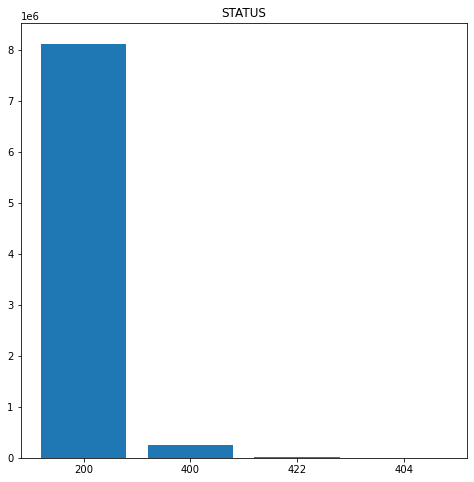

In [44]:
labels = ['200', '400', '422', '404']
plt.figure(figsize = (8, 8))
plt.title('STATUS')
plt.bar(labels, values)

### => 대부분의 STATUS는 200(정상)이다. 
### => 일부 400(bad request)가 보이고 422, 404(not found)는 거의 없다.

### 요청이 많은 상위 10개 URL

In [45]:
url_count = log_df.URL.value_counts()

In [46]:
type(url_count)

pandas.core.series.Series

In [47]:
url_top10 = url_count[:10]

In [48]:
url_addr = url_top10.index
url_addr

Index(['http://dcp.konadc.com:10000/cloud-platform-1.0/api/cards/pars',
       'http://cms.konadc.com:10090/cms-1.0/api/v2/cards/custom',
       'http://ias.konadc.com:10100/issuer-authorization-system-1.0/api/getCardListInfo',
       'http://cms.konadc.com:10090/cms-1.0/api/cards/getstatus/extend-and-deduction',
       'http://pcs.konadc.com:10240/prepaid-card-service-1.0/api/products/simple',
       'http://cardse.konadc.com:10300/cardse-service/api/cardse/cards/info/par/list',
       'http://kps.konadc.com:15940/kps/api/point/holding/types/C',
       'http://koditn.konadc.com:10200/api/kod/v2/policies/point',
       'http://cms.konadc.com:10090/cms-1.0/api/pars/epars',
       'http://cams.konadc.com:10340/cams/api/issued-cards/simple-info'],
      dtype='object')

In [49]:
values = url_top10.values

<BarContainer object of 10 artists>

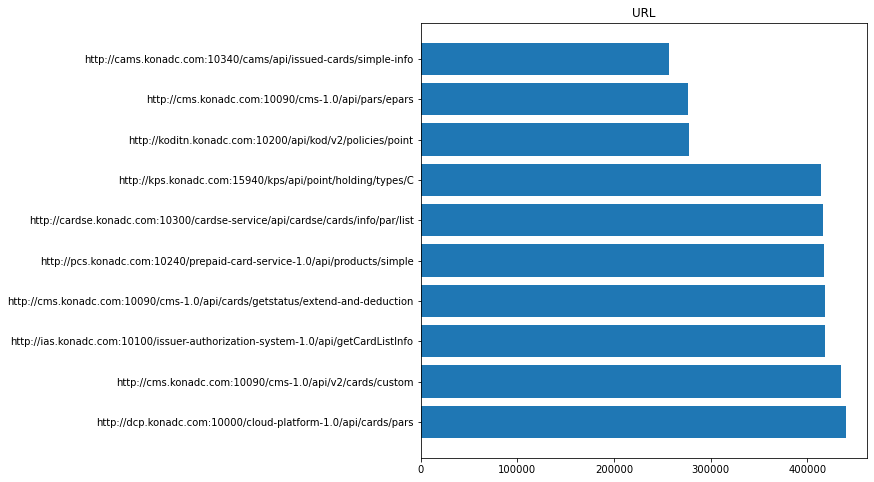

In [50]:
plt.figure(figsize = (8, 8))
plt.title('URL')
plt.barh(url_addr, values)

### datetime별로 time_ms를 합해서 선 그래프를 그려본다.

### COMPONENT별 datetime별 요청량

In [202]:
ias_df = log_df[log_df.COMPONENT == 'IAS']
# ias_df
kps_df = log_df[log_df.COMPONENT == 'KPS']
pcsi_df = log_df[log_df.COMPONENT == 'PCSI']

In [113]:
def split_datetime(df,time):
    datetime = df.datetime
    new_datetime = []
    if time == 'hour':
        idx = -6
    elif time == 'minute':
        idx = -3
        
    for i in datetime:
        new_datetime.append(i[:idx])
    
    return new_datetime

#### IAS

In [199]:
ias_df

,COMPONENT,datetime,TRANSACTION_ID,REQTYPE,URL,STATUS,TIME_MS,int_time_ms
0,IAS,2022-01-18 00:01:39,T[220118000139-1ee5c83],GET,http://koditn.konadc.com:10200/api/kod/v2/prod...,200,3ms,3
1,IAS,2022-01-18 00:01:39,T[220118000139-1ee5c83],GET,http://koditn.konadc.com:10200/api/kod/v2/stor...,200,2ms,2
2,IAS,2022-01-18 00:01:39,T[220118000139-1ee5c83],GET,http://koditn.konadc.com:10200/api/kod/v2/merc...,200,1ms,1
3,IAS,2022-01-18 00:01:39,T[220118000139-1ee5c83],GET,http://koditn.konadc.com:10200/api/kod/v2/rech...,200,1ms,1
4,IAS,2022-01-18 00:01:39,T[220118000139-1ee5c83],GET,http://koditn.konadc.com:10200/api/kod/v2/date...,200,1ms,1
...,...,...,...,...,...,...,...,...
78350,IAS,2022-01-18 23:58:59,T[220118235858-67c0379],GET,http://koditn.konadc.com:10200/api/kod/v2/acqu...,200,1ms,1
78351,IAS,2022-01-18 23:58:59,T[220118235858-67c0379],POST,http://kps.konadc.com:15945/kps/api/v2/point/t...,200,84ms,84
78352,IAS,2022-01-18 23:58:59,T[220118235858-67c0379],POST,http://kps.konadc.com:15945/kps/api/v2/point/t...,200,62ms,62
78353,IAS,2022-01-18 23:59:02,T[220118235901-9595e79],GET,http://koditn.konadc.com:10200/api/kod/v2/prod...,200,4ms,4


In [146]:
def res_count_plot(df, time):
    new_datetime = split_datetime(df, time)
#     print(new_datetime)
    new_datetime_cnt = Counter(new_datetime)
    
    x = list(new_datetime_cnt.keys())
    y = list(new_datetime_cnt.values())
    
    datetime_df = pd.DataFrame({
        'datetime': x,
        'count': y
    })
    
    if time == 'hour':
        temp = datetime_df
    elif time == 'minute':
        top_10_per = datetime_df['count'].quantile(q = 0.95, interpolation = 'nearest')
        temp = datetime_df[datetime_df['count'] >= top_10_per]
    
    temp = temp.loc[::-1]
    x = temp['count']
    y = temp['datetime']
    
    plt.figure(figsize = (20, 20))
    plt.title(f'res_count_{time}')
    plt.barh(y, x)
    
    return temp

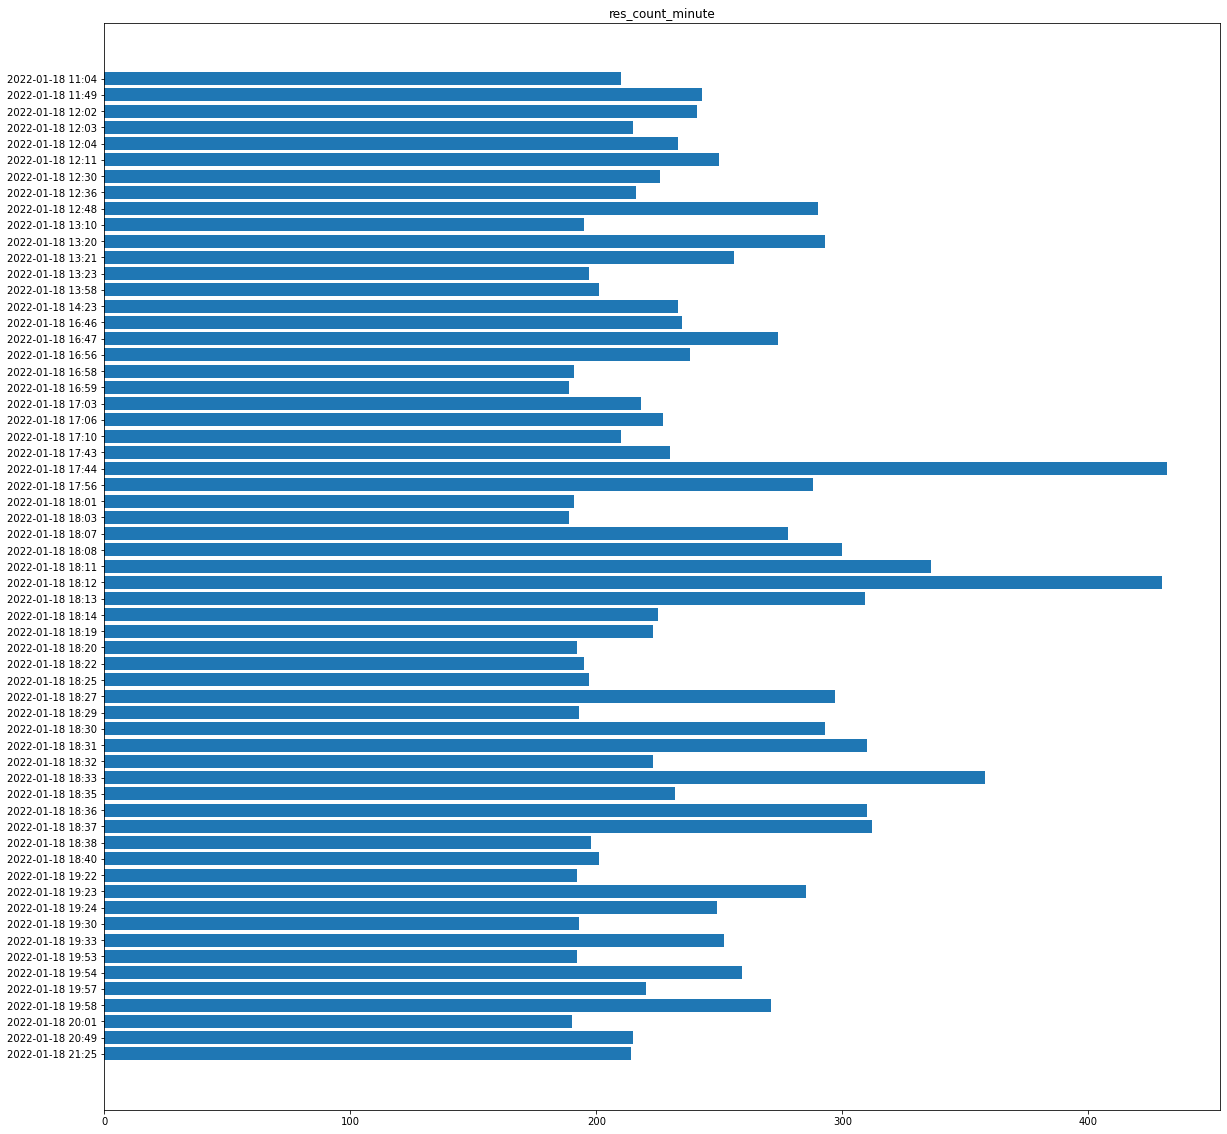

In [136]:
res_count_plot(ias_df, 'minute')

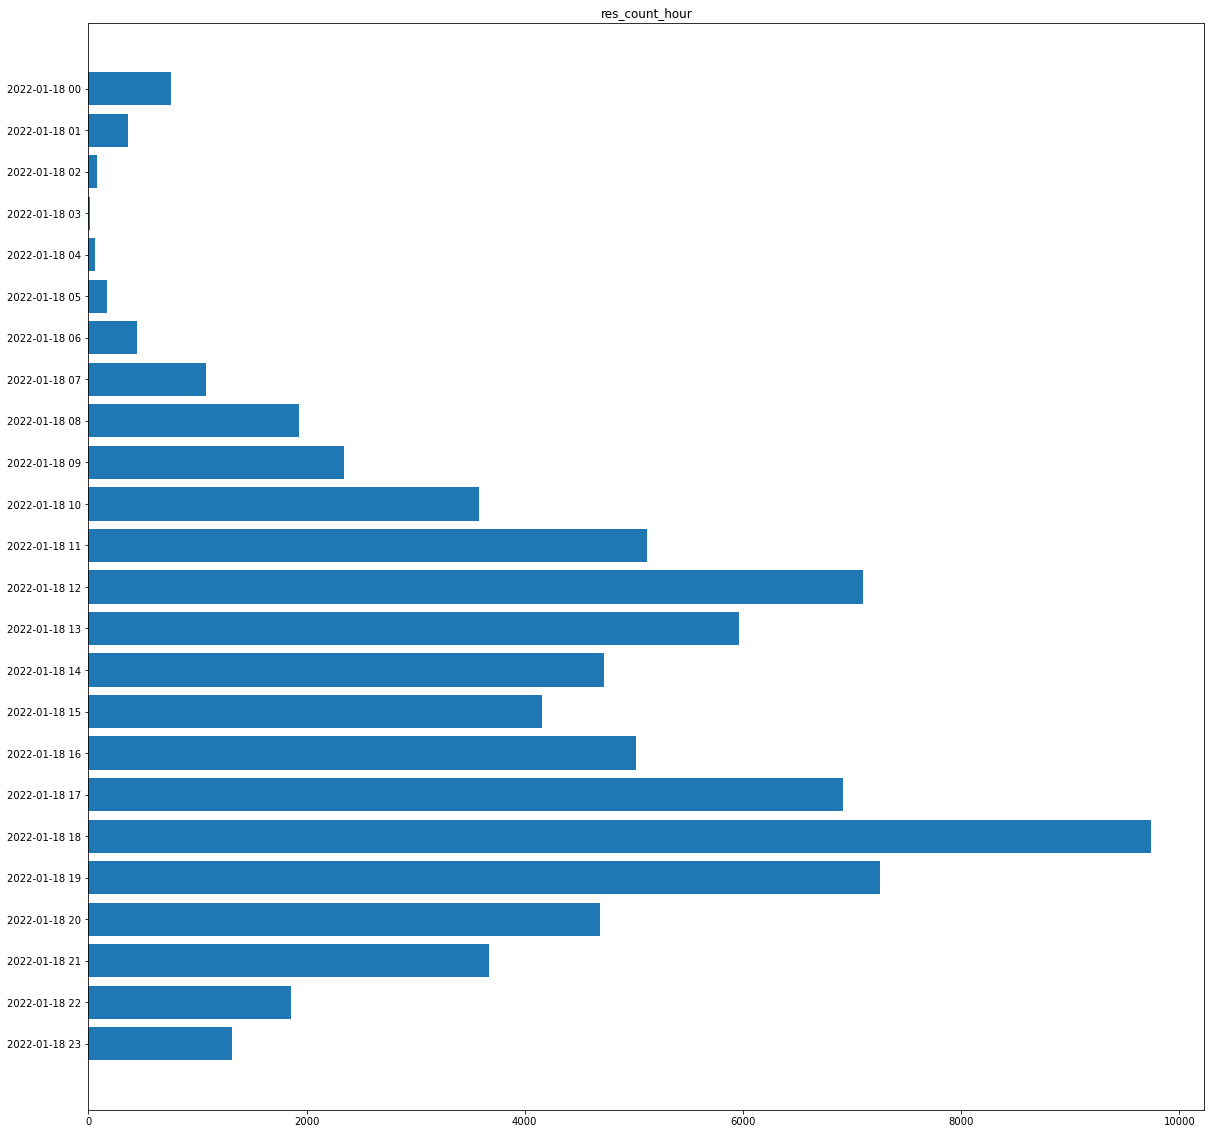

In [137]:
res_count_plot(ias_df, 'hour')

#### kps

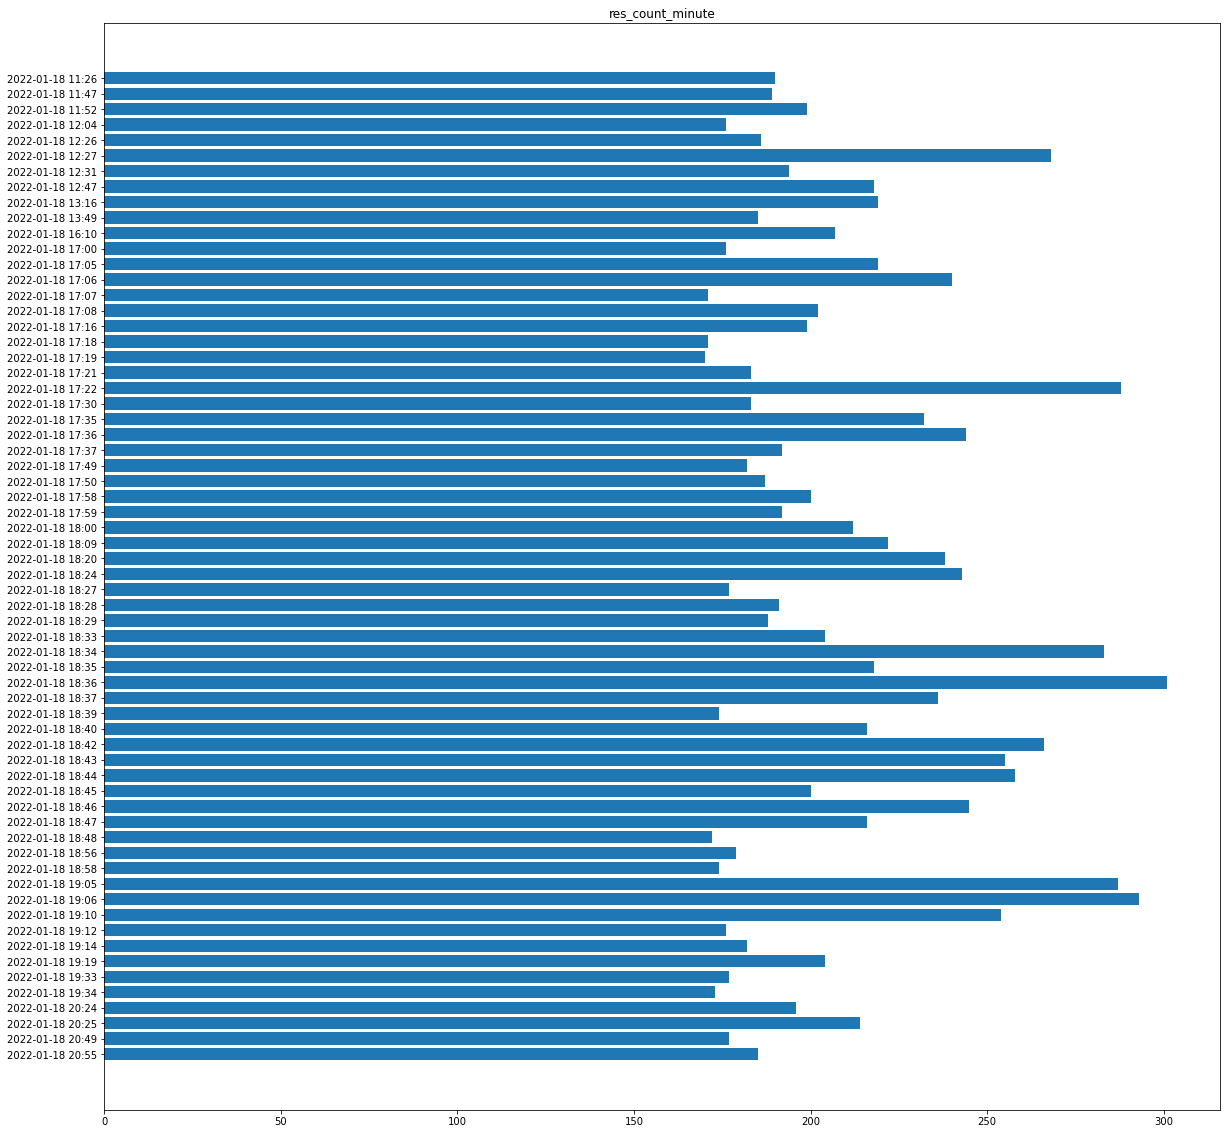

In [139]:
res_count_plot(kps_df, 'minute')

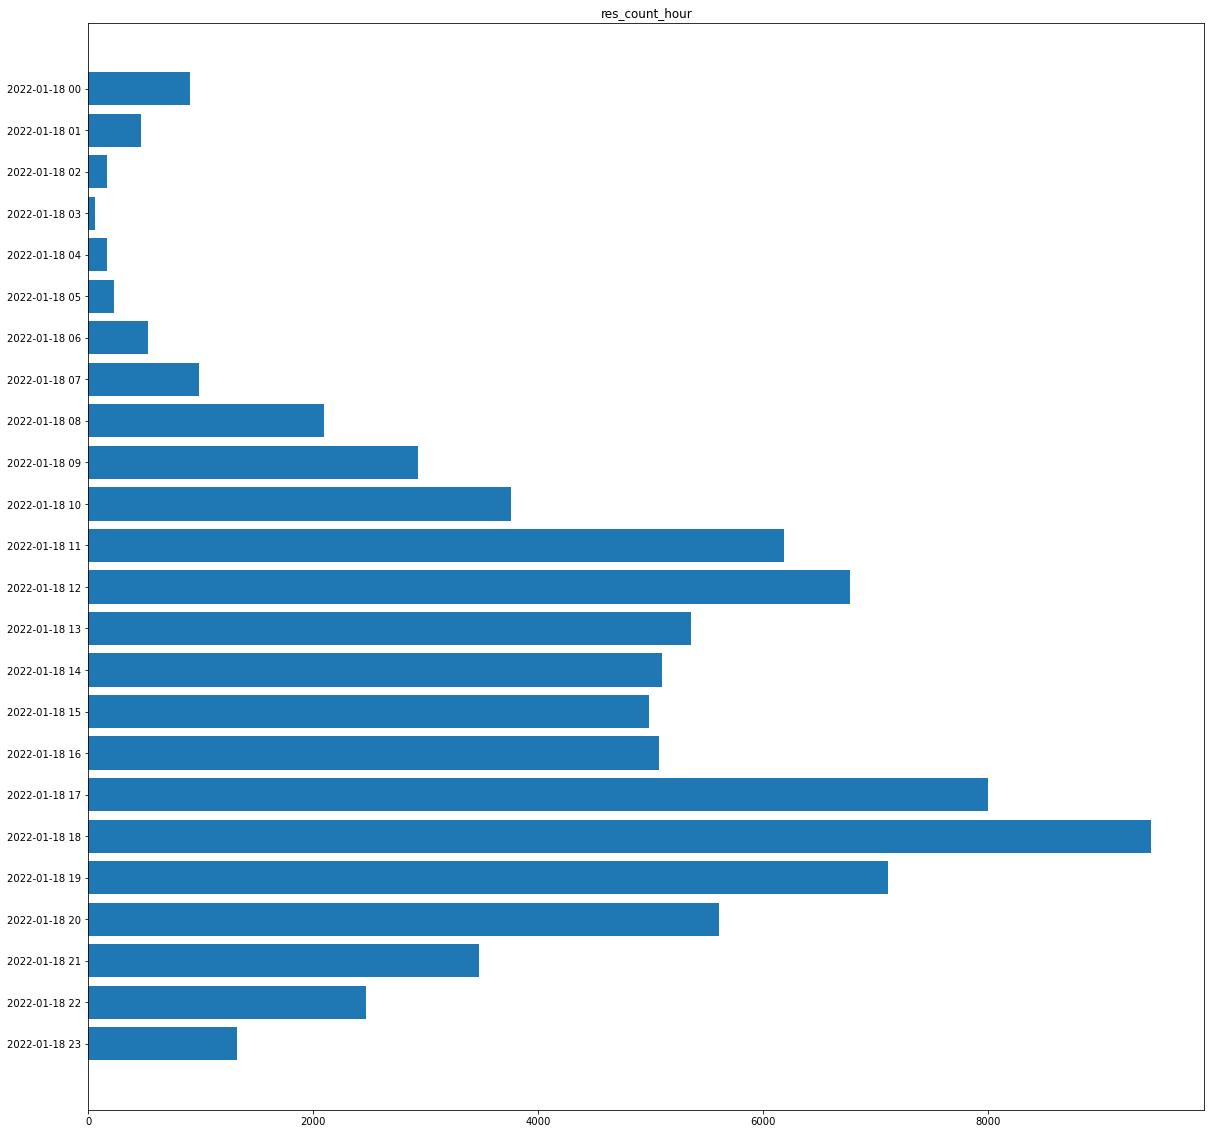

In [138]:
res_count_plot(kps_df, 'hour')

#### pcsi

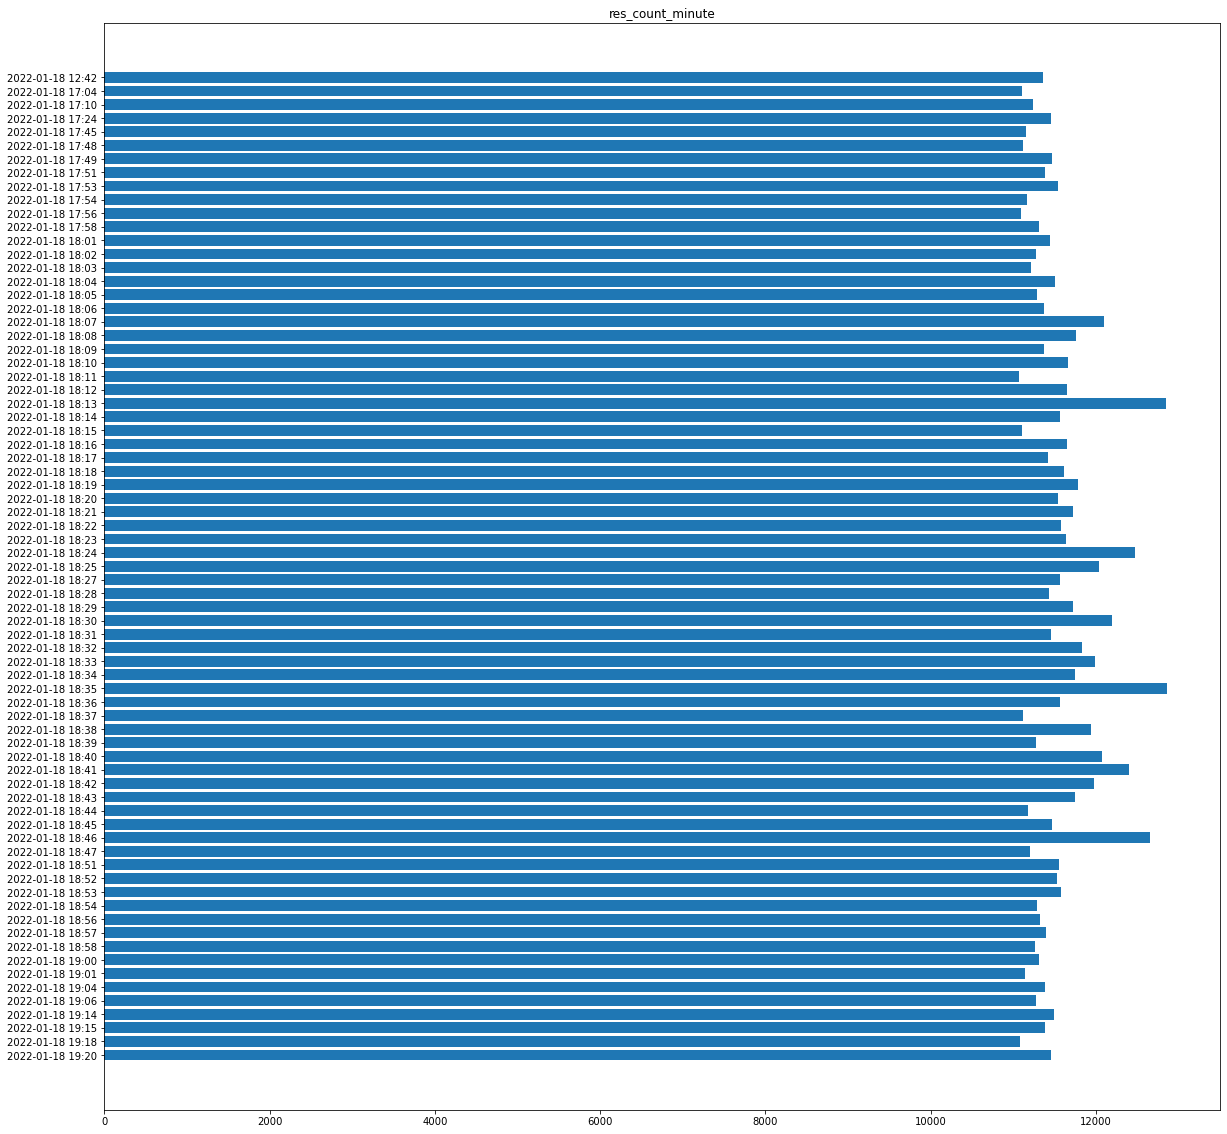

In [140]:
res_count_plot(pcsi_df, 'minute')

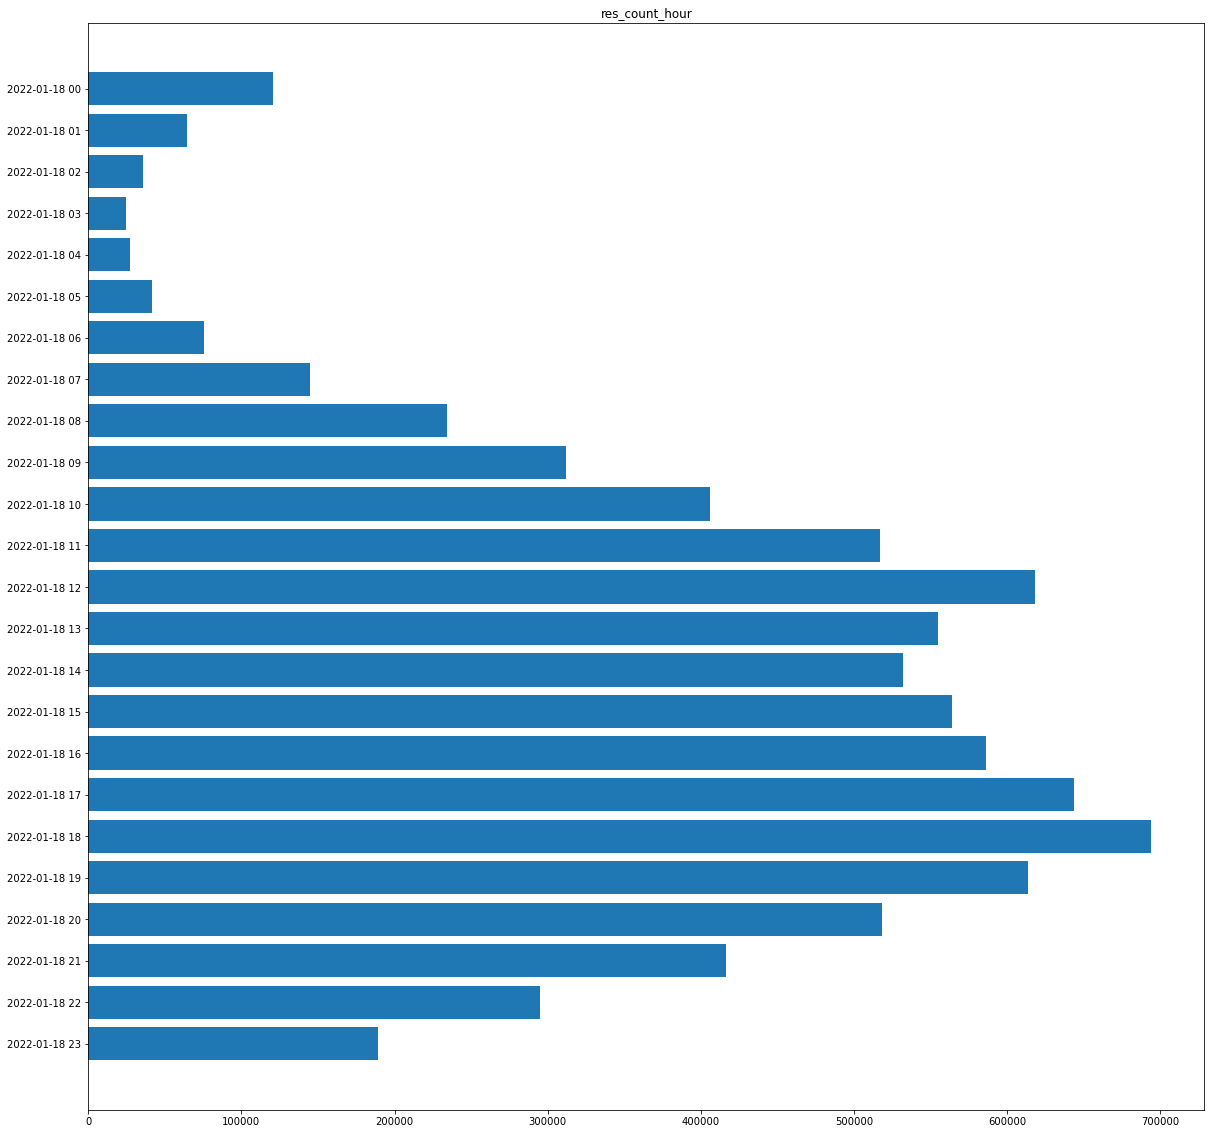

In [141]:
res_count_plot(pcsi_df, 'hour')

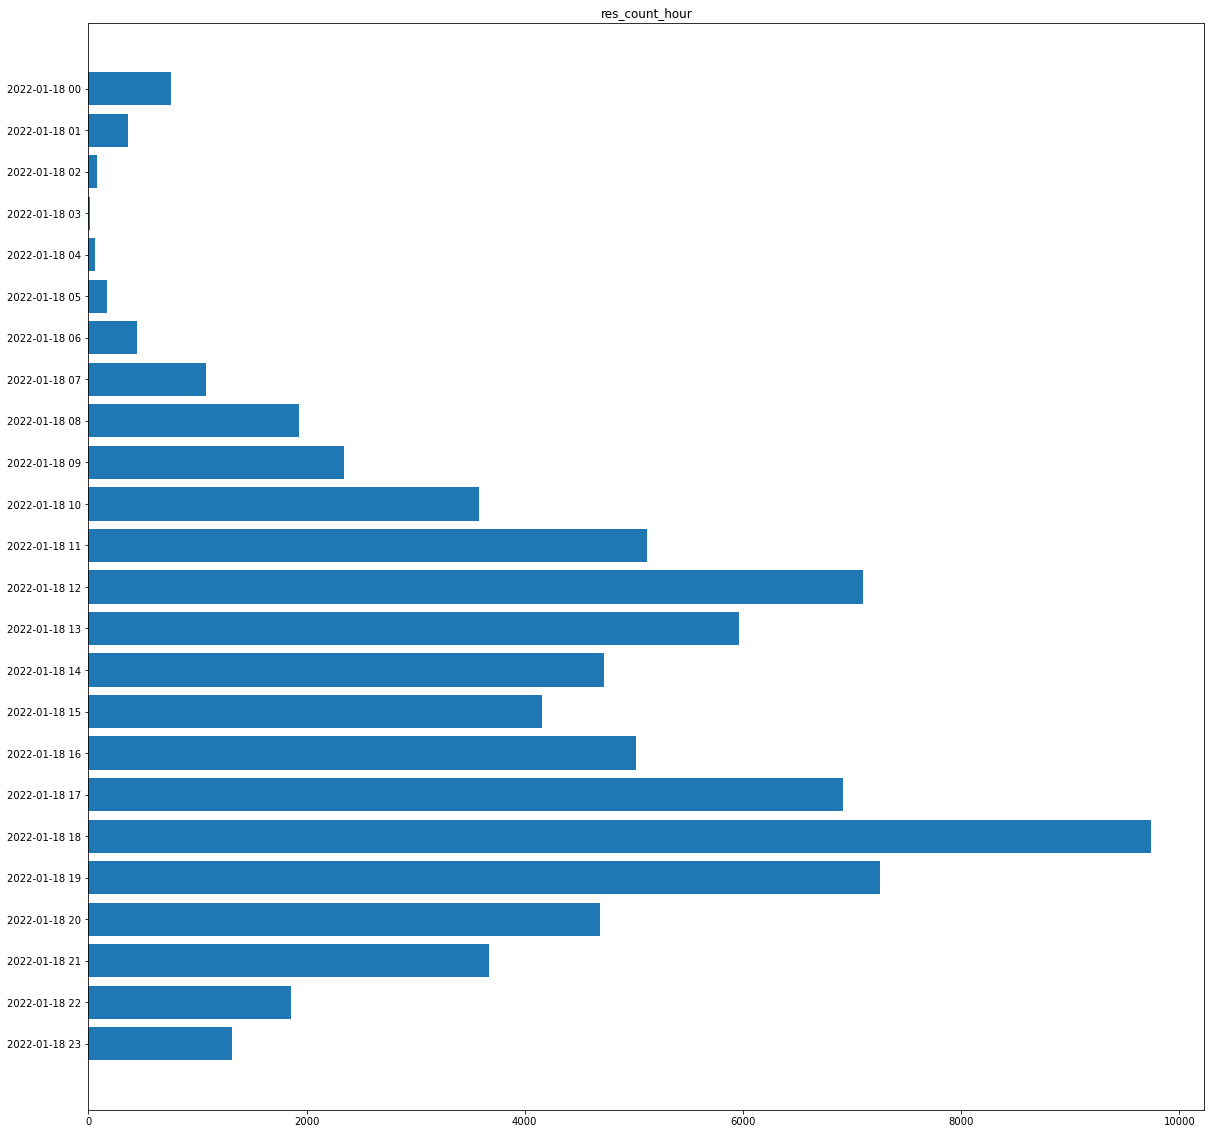

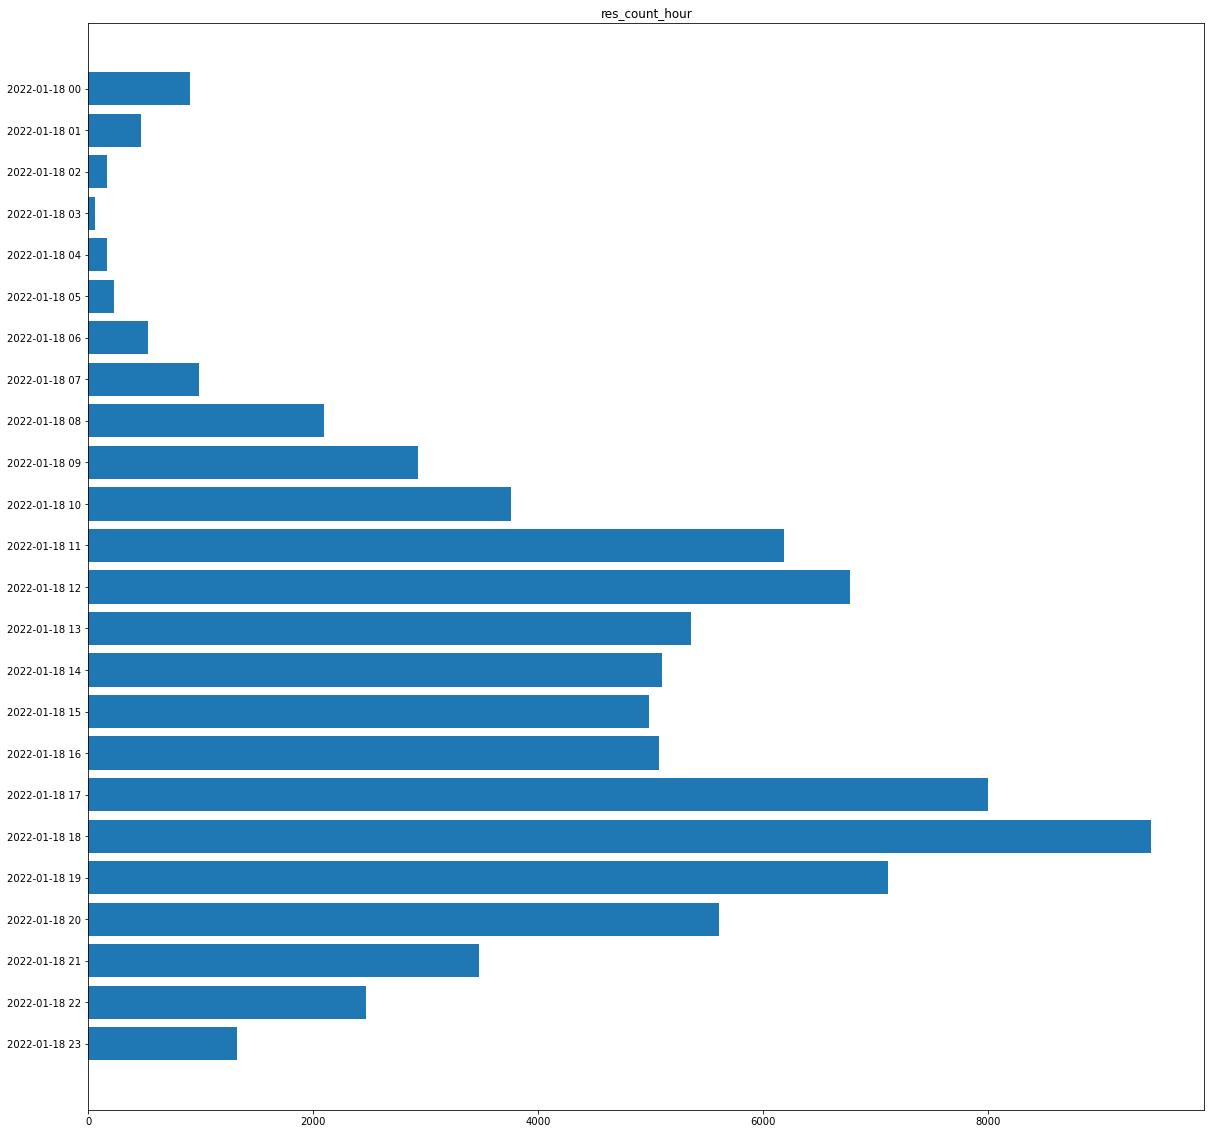

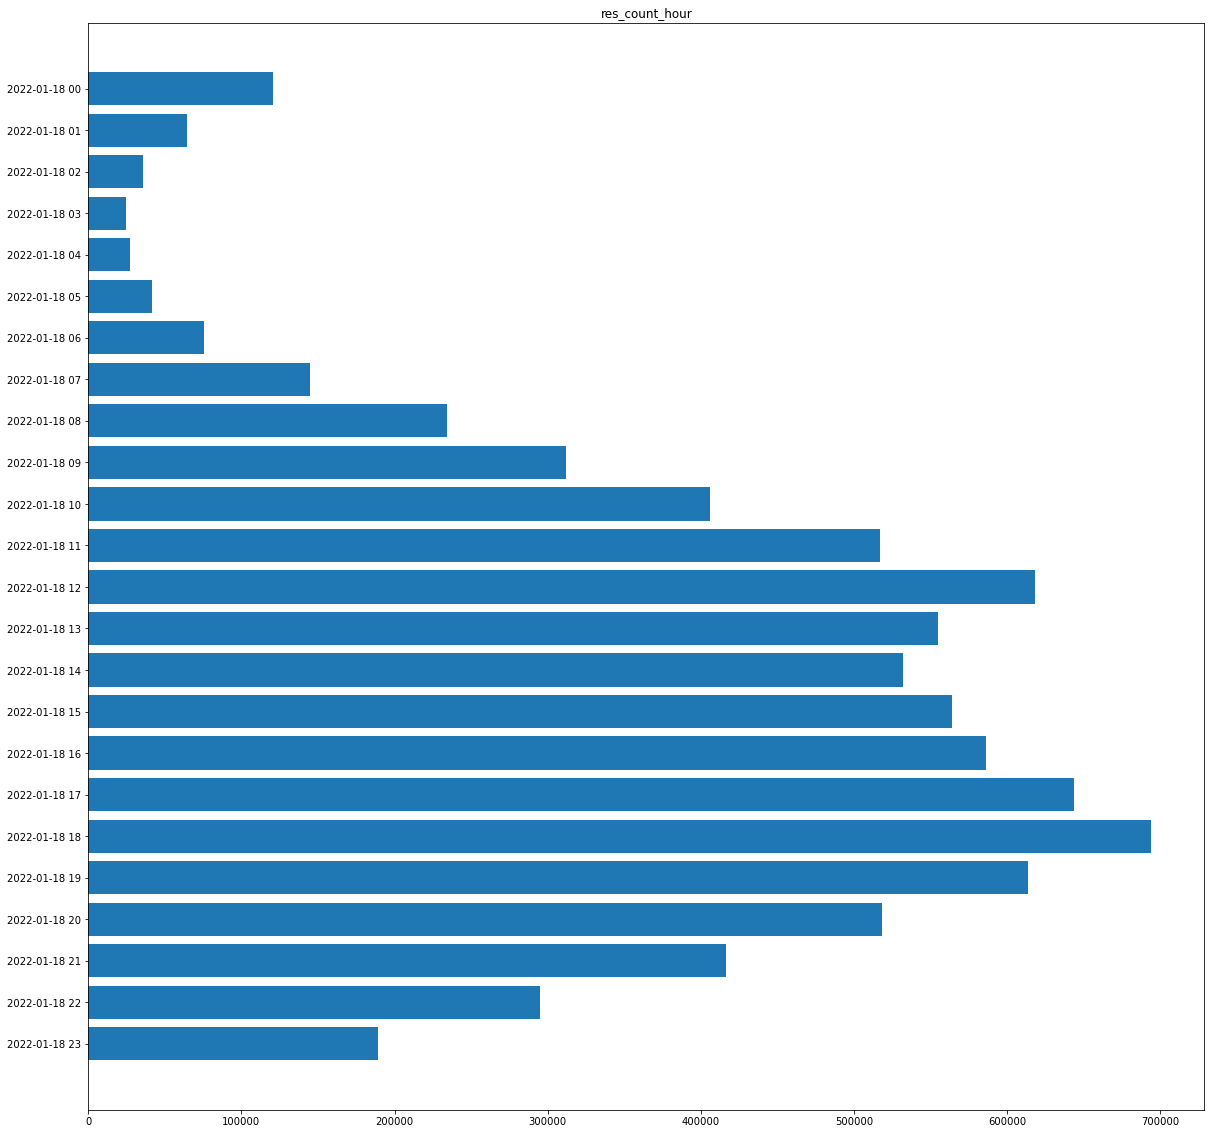

In [150]:
ias_hour_cnt = res_count_plot(ias_df, 'hour')
kps_hour_cnt = res_count_plot(kps_df, 'hour')
pcsi_hour_cnt = res_count_plot(pcsi_df, 'hour')

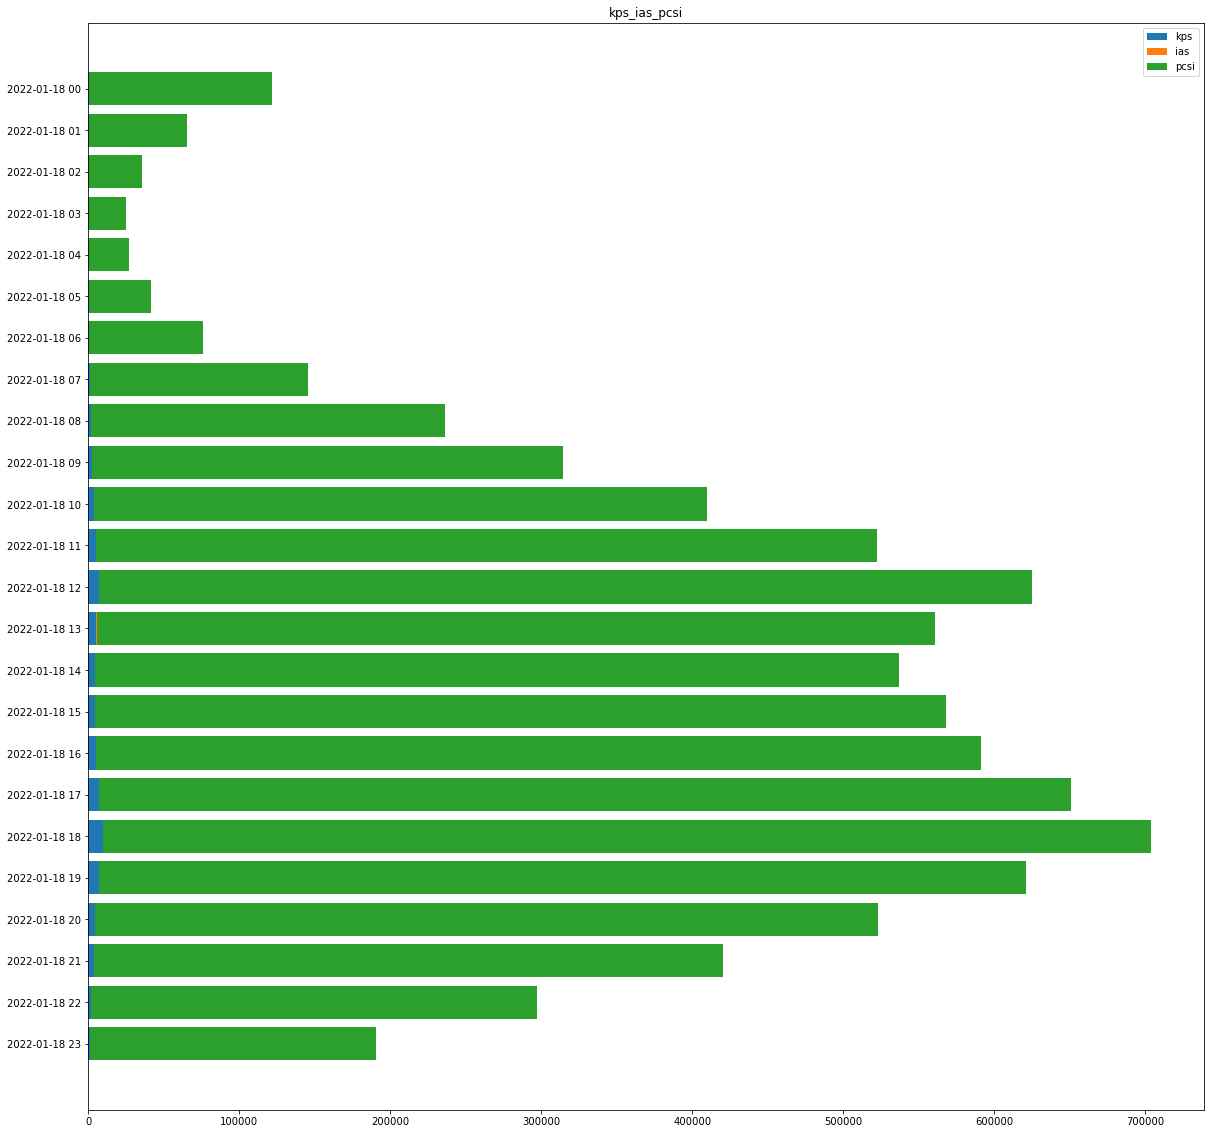

In [161]:
plt.figure(figsize = (20, 20))
plt.barh(kps_hour_cnt['datetime'], kps_hour_cnt['count'])
plt.barh(ias_hour_cnt['datetime'], ias_hour_cnt['count'], left = kps_hour_cnt['count'])
plt.barh(pcsi_hour_cnt['datetime'], pcsi_hour_cnt['count'], left = ias_hour_cnt['count'])
plt.legend(['kps', 'ias', 'pcsi'])
plt.title('kps_ias_pcsi')
plt.show()

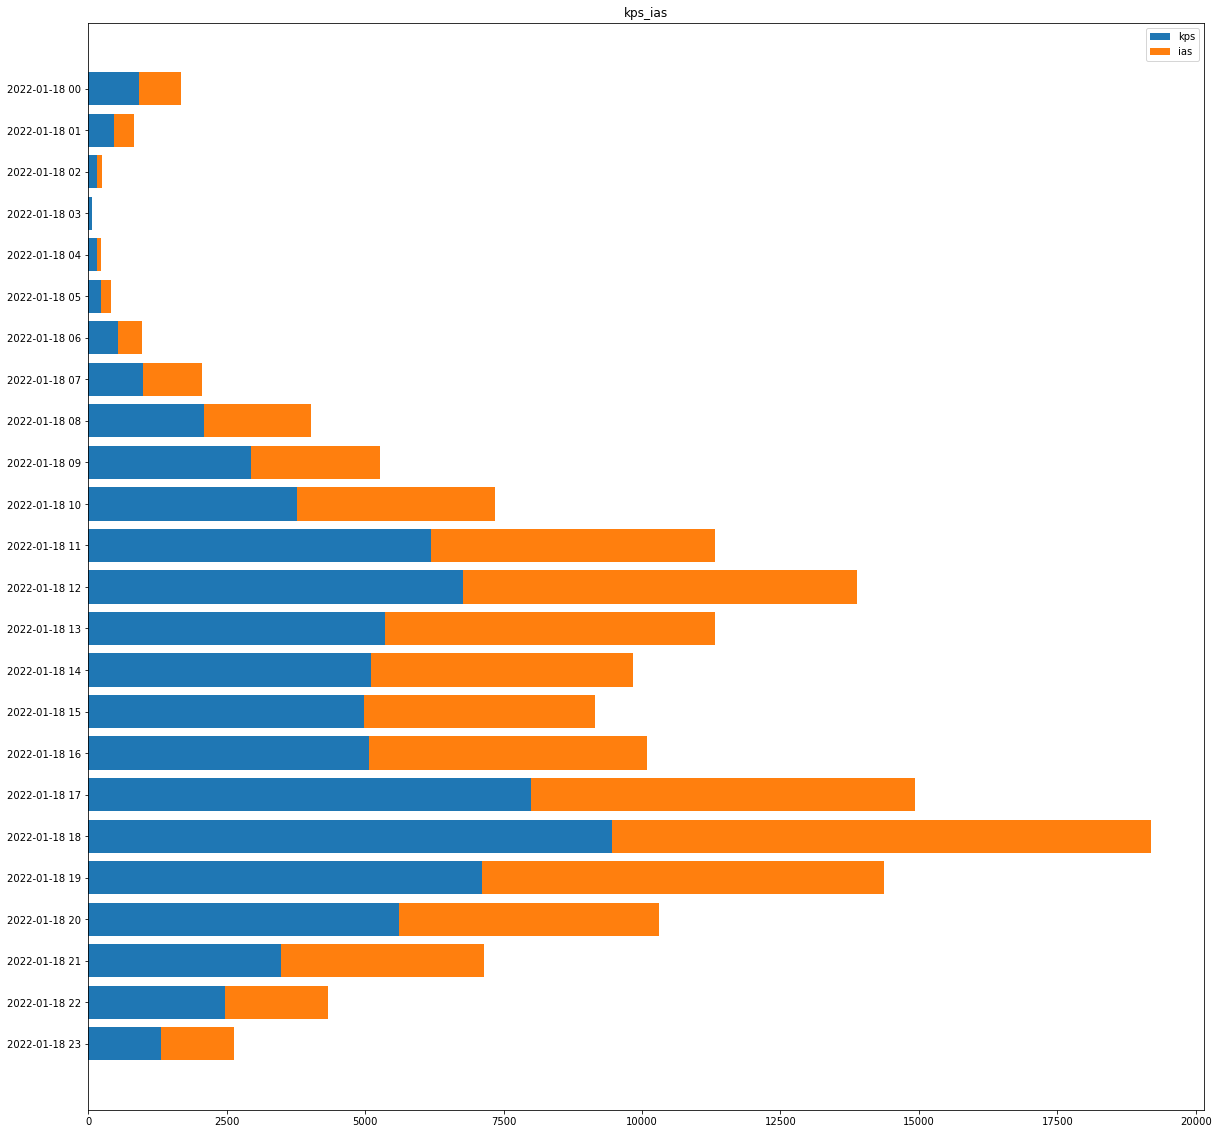

In [163]:
plt.figure(figsize = (20, 20))
plt.barh(kps_hour_cnt['datetime'], kps_hour_cnt['count'])
plt.barh(ias_hour_cnt['datetime'], ias_hour_cnt['count'], left = kps_hour_cnt['count'])
plt.legend(['kps', 'ias'])
plt.title('kps_ias')
plt.show()

### COMPONENT별 datetime별 time_ms 총합 

In [203]:
def split_datetime_2(df,time):
    temp = df.copy()
    new_datetime = []
    if time == 'hour':
        idx = -6
    elif time == 'minute':
        idx = -3

    for i in temp['datetime']:
        new_datetime.append(i[:idx])
    
    temp['datetime'] = new_datetime
    return temp

In [204]:
ias_df_2 = split_datetime_2(ias_df, 'hour')
ias_df_2

,COMPONENT,datetime,TRANSACTION_ID,REQTYPE,URL,STATUS,TIME_MS,int_time_ms
0,IAS,2022-01-18 00,T[220118000139-1ee5c83],GET,http://koditn.konadc.com:10200/api/kod/v2/prod...,200,3ms,3
1,IAS,2022-01-18 00,T[220118000139-1ee5c83],GET,http://koditn.konadc.com:10200/api/kod/v2/stor...,200,2ms,2
2,IAS,2022-01-18 00,T[220118000139-1ee5c83],GET,http://koditn.konadc.com:10200/api/kod/v2/merc...,200,1ms,1
3,IAS,2022-01-18 00,T[220118000139-1ee5c83],GET,http://koditn.konadc.com:10200/api/kod/v2/rech...,200,1ms,1
4,IAS,2022-01-18 00,T[220118000139-1ee5c83],GET,http://koditn.konadc.com:10200/api/kod/v2/date...,200,1ms,1
...,...,...,...,...,...,...,...,...
78350,IAS,2022-01-18 23,T[220118235858-67c0379],GET,http://koditn.konadc.com:10200/api/kod/v2/acqu...,200,1ms,1
78351,IAS,2022-01-18 23,T[220118235858-67c0379],POST,http://kps.konadc.com:15945/kps/api/v2/point/t...,200,84ms,84
78352,IAS,2022-01-18 23,T[220118235858-67c0379],POST,http://kps.konadc.com:15945/kps/api/v2/point/t...,200,62ms,62
78353,IAS,2022-01-18 23,T[220118235901-9595e79],GET,http://koditn.konadc.com:10200/api/kod/v2/prod...,200,4ms,4


In [206]:
kps_df_2 = split_datetime_2(kps_df, 'hour')
kps_df_2

,COMPONENT,datetime,TRANSACTION_ID,REQTYPE,URL,STATUS,TIME_MS,int_time_ms
78355,KPS,2022-01-18 00,T[220118000003-5824ac6],GET,http://koditn.konadc.com:10200/api/kod/v2/asps...,200,2ms,2
78356,KPS,2022-01-18 00,T[220118000003-5824ac6],GET,http://cms.konadc.com:10090/cms-1.0/api/v2/car...,200,3ms,3
78357,KPS,2022-01-18 00,T[220118000003-5824ac6],GET,http://koditn.konadc.com:10200/api/kod/v2/poin...,200,1ms,1
78358,KPS,2022-01-18 00,T[220118000003-5824ac6],POST,http://dms.konadc.com:10260/dms/donations/real...,200,4ms,4
78359,KPS,2022-01-18 00,T[220118000003-5824ac6],GET,http://map.konadc.com:10010/mobile-platform-1....,200,10ms,10
...,...,...,...,...,...,...,...,...
161559,KPS,2022-01-18 23,T[220118235906-4568aca],GET,http://koditn.konadc.com:10200/api/kod/v2/poli...,200,2ms,2
161560,KPS,2022-01-18 23,T[220118235906-4568aca],GET,http://koditn.konadc.com:10200/api/kod/v2/poin...,200,1ms,1
161561,KPS,2022-01-18 23,T[220118235906-4568aca],GET,http://koditn.konadc.com:10200/api/kod/v2/poli...,200,6ms,6
161562,KPS,2022-01-18 23,T[],GET,http://koditn.konadc.com:10200/api/kod/v2/prod...,200,6ms,6


In [207]:
pcsi_df_2 = split_datetime_2(pcsi_df, 'hour')
pcsi_df_2

,COMPONENT,datetime,TRANSACTION_ID,REQTYPE,URL,STATUS,TIME_MS,int_time_ms
161564,PCSI,2022-01-18 00,T[220118000000-6629122],POST,http://ias.konadc.com:10100/issuer-authorizati...,200,10ms,10
161565,PCSI,2022-01-18 00,T[220118000000-6629122],GET,http://dcp.konadc.com:10000/cloud-platform-1.0...,200,7ms,7
161566,PCSI,2022-01-18 00,T[220118000000-6629122],POST,http://pcs.konadc.com:10240/prepaid-card-servi...,200,43ms,43
161567,PCSI,2022-01-18 00,T[220118000000-6629122],POST,http://cardse.konadc.com:10300/cardse-service/...,200,7ms,7
161568,PCSI,2022-01-18 00,T[220118000000-6629122],GET,http://cms.konadc.com:10090/cms-1.0/api/cards/...,200,16ms,16
...,...,...,...,...,...,...,...,...
8390771,PCSI,2022-01-18 23,T[220118235959-9f8c943],GET,http://cams.konadc.com:10340/cams/api/issued-c...,200,2ms,2
8390772,PCSI,2022-01-18 23,T[220118235959-9f8c943],GET,http://cms.konadc.com:10090/cms-1.0/api/pars/e...,400,17ms,17
8390773,PCSI,2022-01-18 23,T[220118235959-9f8c943],POST,http://konacard-contents.azureedge.net/service...,200,168ms,168
8390774,PCSI,2022-01-18 23,T[220118235959-7d16d0d],POST,http://ias.konadc.com:10100/issuer-authorizati...,200,6ms,6


In [236]:
ias_group = ias_df_2.groupby('datetime').agg({'int_time_ms': np.sum})[::-1]

In [237]:
kps_group = kps_df_2.groupby('datetime').agg({'int_time_ms': np.sum})[::-1]

In [238]:
pcsi_group = pcsi_df_2.groupby('datetime').agg({'int_time_ms': np.sum})[::-1]

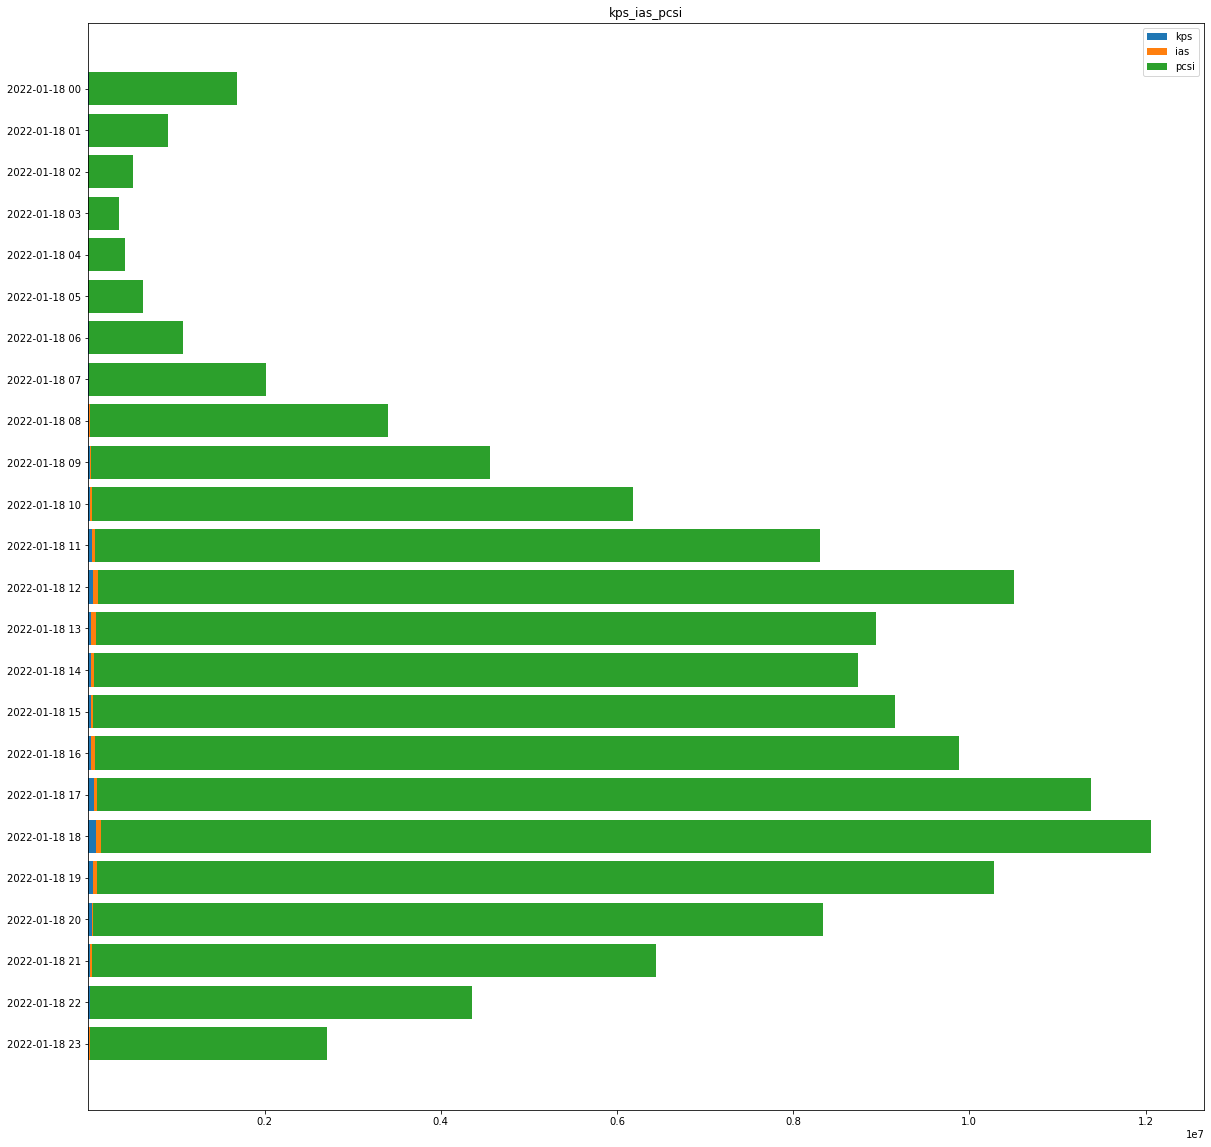

In [239]:
plt.figure(figsize = (20, 20))
plt.barh(kps_group.index, kps_group['int_time_ms'])
plt.barh(ias_group.index, ias_group['int_time_ms'], left = kps_group['int_time_ms'])
plt.barh(pcsi_group.index, pcsi_group['int_time_ms'], left = ias_group['int_time_ms'])
plt.legend(['kps', 'ias', 'pcsi'])
plt.title('kps_ias_pcsi')
plt.show()

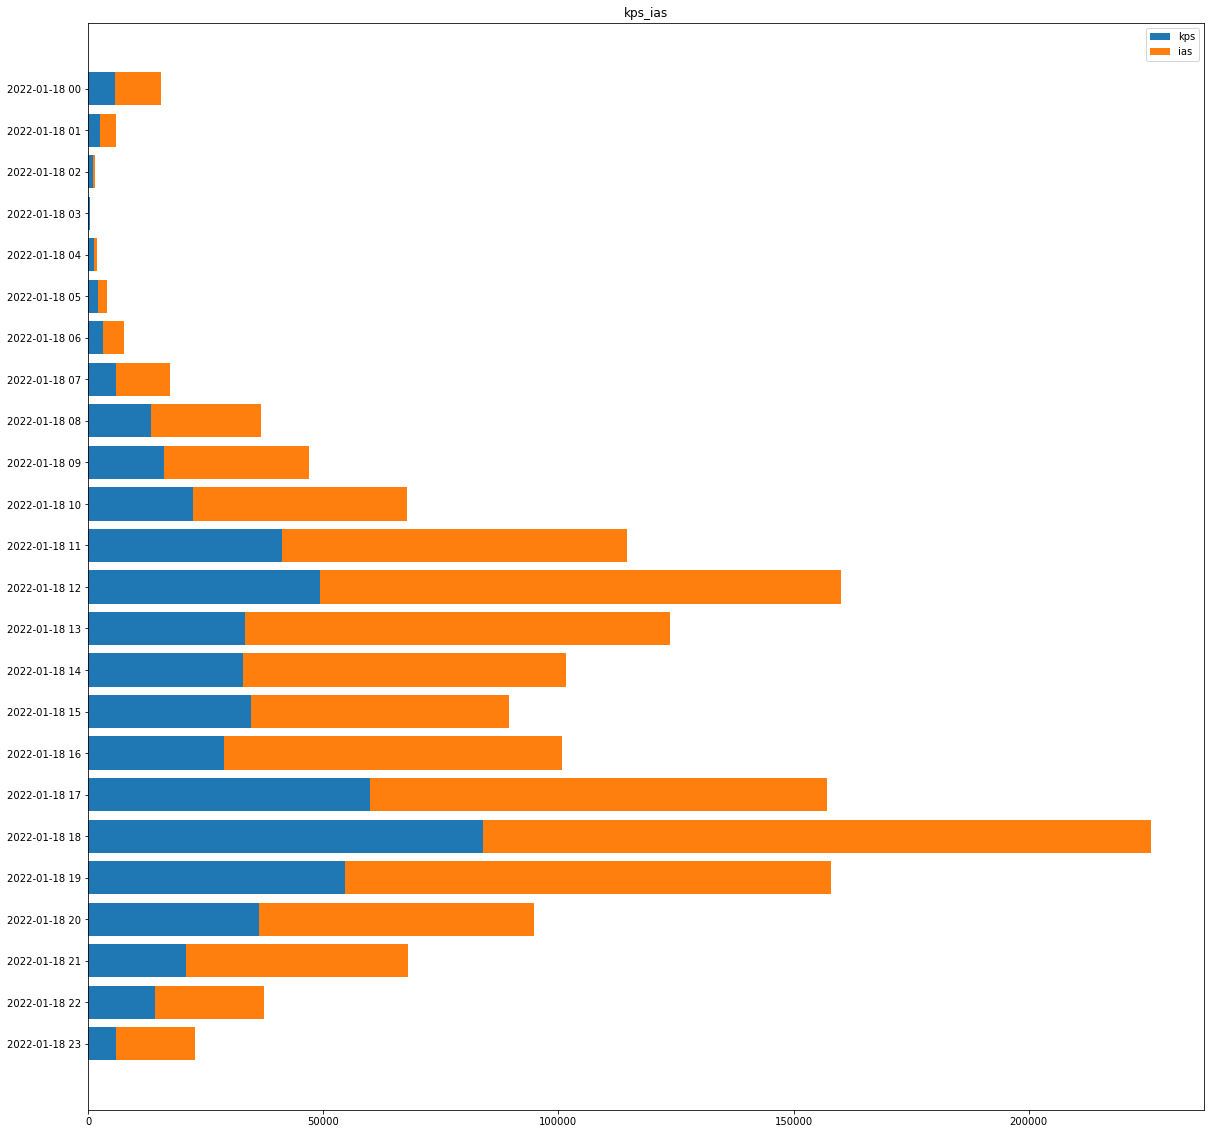

In [240]:
plt.figure(figsize = (20, 20))
plt.barh(kps_group.index, kps_group['int_time_ms'])
plt.barh(ias_group.index, ias_group['int_time_ms'], left = kps_group['int_time_ms'])
plt.legend(['kps', 'ias'])
plt.title('kps_ias')
plt.show()